---
title: "LOESS-based derivatives"
execute:
  # echo: false
  freeze: auto  # re-render only when source changes
format:
  html:
    code-fold: true
    code-summary: "Show the code"
---

In [1]:
#| code-summary: "import stuff"
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
import seaborn as sns
sns.set(style="ticks", font_scale=1.5)  # white graphs, with large and legible letters
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
# %matplotlib widget

In [2]:
#| code-summary: "load data"
filename = "dead_sea_1d.csv"
df = pd.read_csv(filename)
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')

We can use `scipy.signal.savgol_filter` to apply a LOESS filter. By choosing the argument `deriv=1`, we tell it to return the first derivative of the smoothed signal.

In [3]:
#| code-fold: false
df['smoothed'] = scipy.signal.savgol_filter(df['level'].values,
                                            window_length=24*30,
                                            polyorder=3)

df['savgol_deriv'] = scipy.signal.savgol_filter(df['level'].values,
                                                window_length=24*30,
                                                polyorder=3,
                                                deriv=1)

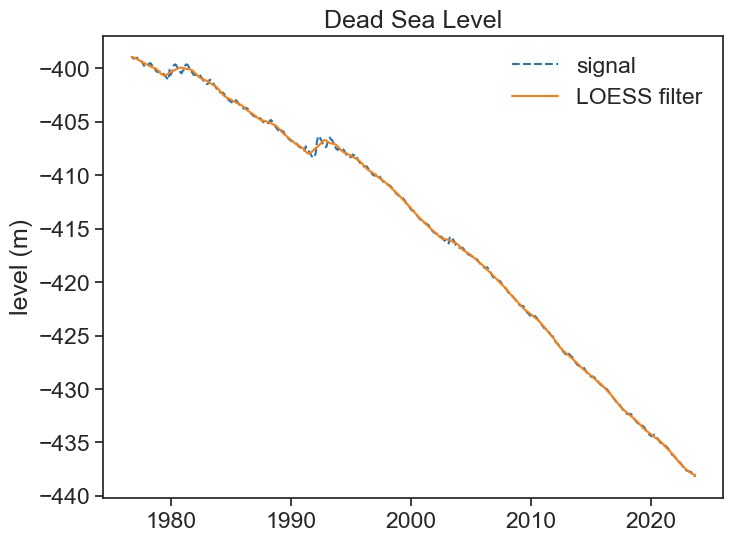

In [7]:
#| code-summary: "plot"
fig, ax = plt.subplots(1, 1, figsize=(8,6))
ax.plot(df['level'], ls="--", color="tab:blue", label="signal")
ax.plot(df['smoothed'], color="tab:orange", label=r"LOESS filter")
ax.legend(frameon=False)
ax.set(title="Dead Sea Level",
          ylabel="level (m)");

In [5]:
#| code-summary: "calculate gradient"
df['level_smooth_yr'] = df['level'].rolling('365D', center=True).mean()
df['grad_yr'] = np.gradient(df['level_smooth_yr'].values)

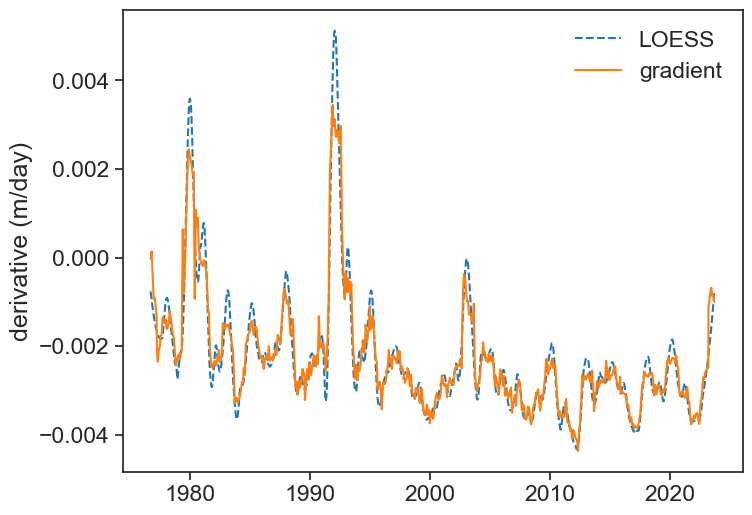

In [8]:
#| code-summary: "compare LOESS with grandient"
fig, ax = plt.subplots(1, 1, figsize=(8,6))
ax.plot(df['savgol_deriv'], ls="--", color="tab:blue", label="LOESS")
ax.plot(df['grad_yr'], color="tab:orange", label="gradient")
ax.legend(frameon=False)
ax.set(ylabel="derivative (m/day)");